In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime

In [2]:
df_700 = pd.read_csv('transformed data 700 600 150/engine_runs_table_final.csv', sep=",", quoting=csv.QUOTE_ALL)

In [3]:
df_600 = pd.read_csv('transformed data 600 500 50/engine_runs_table_final.csv', sep=",", quoting=csv.QUOTE_ALL)

In [12]:
df = df_600

In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'Date (MM/DD/YYYY)', 'File', 'Gtype',
       'Flight Time', 'Start Time', 'End Time', 'Landing',
       'Start_Alt (ft MSL)', 'Max Altitude (ft MSL/ft AGL)',
       'Surface Height (ft MSL)', 'Pressure Altitude (ft MSL)', 'Offset (ft)',
       'Sensor Info', 'ENL_Engine_Run_Start_Times',
       'MOP_Engine_Run_Start_Times', 'RPM_Engine_Run_Start_Times',
       'ENL_Engine_Run_Altitudes_MSL', 'MOP_Engine_Run_Altitudes_MSL',
       'RPM_Engine_Run_Altitudes_MSL', 'ENL_Engine_Run_Altitudes_AGL',
       'MOP_Engine_Run_Altitudes_AGL', 'RPM_Engine_Run_Altitudes_AGL',
       'ENL_Noise_Registration_Times', 'MOP_Noise_Registration_Times',
       'RPM_Noise_Registration_Times', 'ENL_Noise_Registration_Altitudes_AGL',
       'MOP_Noise_Registration_Altitudes_AGL',
       'RPM_Noise_Registration_Altitudes_AGL', 'first_event_time',
       'event_type', 'event_sensor', 'first_event_datetime',
       'flight_start_datetime', 'window_start', 'window_end',
       'engine

In [14]:
df['Height_Gain_Indicator'] = df['height_gain_loss (ft)'].apply(
    lambda x: 1 if x > 0 else (0 if x < 0 else 0)
)

In [15]:

df['Height_Gain_Indicator'] = df['height_gain_loss (ft)'].apply(lambda x: 1 if x > 0 else 0)


gain_status = df.groupby('File')['Height_Gain_Indicator'].transform(lambda x: int(x.all()))

df['All_Gain_For_Flight_Ind'] = gain_status


In [16]:

df['Height_Loss_Indicator'] = df['height_gain_loss (ft)'].apply(lambda x: 1 if x < 0 else 0)


loss_status = df.groupby('File')['Height_Loss_Indicator'].transform(lambda x: int(x.all()))

df['All_Loss_For_Flight_Ind'] = loss_status


In [17]:
df['Blue_Line_Speed_Success_Ind'] = df['All_Avg_TAS_knots'].apply(
    lambda x: 1 if 50 <= x <= 70 else 0
)

In [18]:
df.head(10)

,Unnamed: 0,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),...,max_noise_MOP,max_noise_RPM,Engine_Run_Start_Times,time_difference,Engine_Event_LessThan_5min_into_flight,Height_Gain_Indicator,All_Gain_For_Flight_Ind,Height_Loss_Indicator,All_Loss_For_Flight_Ind,Blue_Line_Speed_Success_Ind
0,0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,16:44:59,202200,HOME,652,...,NaN,NaN,16:57:05,00:12:06,0,1,1,0,0,1
1,1,15,06/27/2024,46RGJUM1.IGC,VENTUS 3F,3:42:29,19:37:03,231932,HOME,3713,...,NaN,NaN,19:37:03,00:00:00,1,1,1,0,0,1
2,2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,18:38:35,215721,HOME,301,...,NaN,NaN,18:47:38,00:09:03,0,1,1,0,0,1
3,3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:26:16,00:54:44,0,1,1,0,0,1
4,4,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:30:56,00:59:24,0,1,1,0,0,1
5,5,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,17:07:46,212139,HOME,301,...,609.0,NaN,17:18:02,00:10:16,0,0,0,1,1,1
6,6,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,...,NaN,NaN,18:09:36,00:05:56,0,1,1,0,0,1
7,7,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,...,NaN,NaN,22:34:24,04:30:44,0,1,1,0,0,1
8,8,43,03/14/2020,03EGIQO1.IGC,SZD-56-3 DIANA-2 FES,4:07:39,17:03:31,211110,HOME,144,...,NaN,NaN,21:08:05,04:04:34,0,1,1,0,0,1
9,9,48,08/04/2024,2024-08-04-CNI-29F-01.IGC,AS 33ES,3:33:16,16:48:35,202151,HOME,1712,...,NaN,NaN,16:58:47,00:10:12,0,1,1,0,0,1


In [19]:
df.to_csv("engine_runs_table_final.csv", index=False)

/home/vuh5mk/.local/lib/python3.11/site-packages/pandas/core/indexes/base.py:7833: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [4]:
expanded_rows = []

for _, row in df.iterrows():
    run_list = [int(x.strip()) for x in str(row["engine_run_times (s)"]).split(",")]
    gain_list = [int(x.strip()) for x in str(row["height_gain_loss (ft)"]).split(",")]

    # Convert to readable HH:MM:SS time
    raw_time = str(row["first_event_time"]).zfill(6)
    readable_time = datetime.strptime(raw_time, "%H%M%S").time().strftime("%H:%M:%S")

    for run, gain in zip(run_list, gain_list):
        expanded_rows.append({
            "index": row["index"],
            "engine_run_time (s)": run,
            "height_gain_loss (ft)": gain,
            "altitude_gain": gain > 0,  # True if gain, False if loss
            "first_event_time": readable_time,
            "alt_rate_pre_event (ft/s)": row["altitude rate of change during pre-event window(ft/s)"]
        })

df = pd.DataFrame(expanded_rows)
df.head(10)

KeyError: 'engine_run_times (s)'

In [53]:
summary = df['altitude_gain'].value_counts()

print("Altitude Gain vs Loss Summary:")
print(summary)

Altitude Gain vs Loss Summary:
True     648
False    225
Name: altitude_gain, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

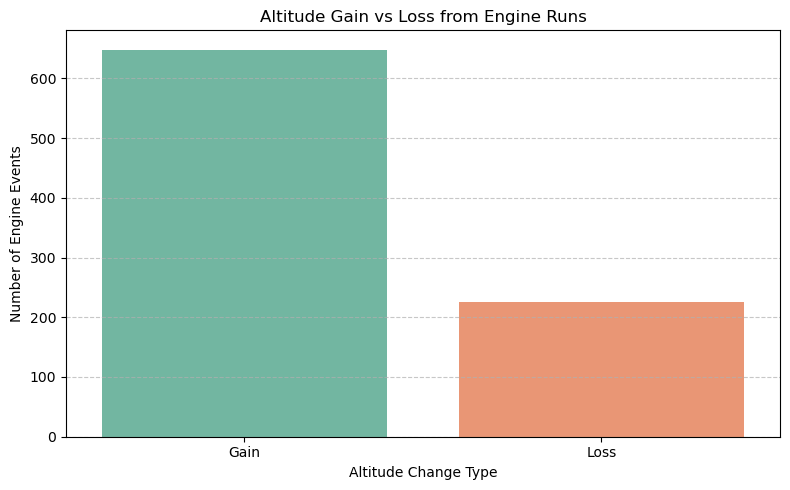

In [54]:
df["Altitude Change"] = df["altitude_gain"].map({True: "Gain", False: "Loss"})

summary_df = df["Altitude Change"].value_counts().reset_index()
summary_df.columns = ["Altitude Change", "Count"]

plt.figure(figsize=(8, 5))
sns.barplot(data=summary_df, x="Altitude Change", y="Count", palette="Set2")

plt.title("Altitude Gain vs Loss from Engine Runs")
plt.xlabel("Altitude Change Type")
plt.ylabel("Number of Engine Events")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show

In [55]:
summary = df.groupby("index").agg(
    num_engine_runs=("engine_run_time (s)", "count"),
    num_gains=("altitude_gain", lambda x: (x == True).sum()),
    num_losses=("altitude_gain", lambda x: (x == False).sum()),
    total_gain_ft=("height_gain_loss (ft)", lambda x: sum(val for val in x if val > 0)),
    total_loss_ft=("height_gain_loss (ft)", lambda x: sum(val for val in x if val < 0)),
    avg_run_time=("engine_run_time (s)", "mean")
).reset_index()

summary

,index,num_engine_runs,num_gains,num_losses,total_gain_ft,total_loss_ft,avg_run_time
0,13,1,1,0,1358,0,180.0
1,15,1,1,0,908,0,120.0
2,24,1,1,0,233,0,60.0
3,25,2,2,0,1496,0,180.0
4,28,1,0,1,0,-112,60.0
...,...,...,...,...,...,...,...
403,2309,3,3,0,7205,0,380.0
404,2337,1,1,0,1853,0,120.0
405,2344,1,1,0,4101,0,1620.0
406,2345,1,1,0,2264,0,1020.0


In [56]:
def gain_loss_status(group):
    has_gain = (group['altitude_gain'] == True).any()
    has_loss = (group['altitude_gain'] == False).any()
    if has_gain and has_loss:
        return "Both"
    elif has_gain:
        return "Only Gain"
    else:
        return "Only Loss"

flight_status = df.groupby("index").apply(gain_loss_status).reset_index(name="Flight Type")

summary_counts = flight_status["Flight Type"].value_counts().reset_index()
summary_counts.columns = ["Flight Type", "Number of Flights"]

print(summary_counts)

  Flight Type  Number of Flights
0   Only Gain                344
1        Both                 39
2   Only Loss                 25


In [57]:
def compute_altitude_gain_string(height_val):
    height_str = str(height_val)  # Force to string
    values = [int(x.strip()) for x in height_str.split(",")]
    gain_flags = ["True" if v > 0 else "False" for v in values]
    return ",".join(gain_flags)

df["altitude_gain"] = df["height_gain_loss (ft)"].apply(compute_altitude_gain_string)

df = df.reset_index()
df = df[["index", "height_gain_loss (ft)", "altitude_gain"]]
df.head(10)

,index,height_gain_loss (ft),altitude_gain
0,13,1358,True
1,15,908,True
2,24,233,True
3,25,941,True
4,25,555,True
5,28,-112,False
6,32,315,True
7,32,2714,True
8,43,122,True
9,48,108,True


In [58]:
def process_gain_loss(values):
    int_values = [int(v.strip()) for v in values]
    gains = ["True" if val > 0 else "False" for val in int_values]
    return ",".join(gains)

# Group by index and recompute both strings
grouped_df = df.groupby("index").agg({
    "height_gain_loss (ft)": lambda x: ",".join(str(v) for v in x)
}).reset_index()

grouped_df["altitude_gain_at_time_of_event"] = grouped_df["height_gain_loss (ft)"].apply(
    lambda s: process_gain_loss(s.split(","))
)

In [59]:
grouped_df["all_gain_flag"] = grouped_df["altitude_gain_at_time_of_event"].apply(
    lambda x: 1 if all(val.strip() == "True" for val in x.split(",")) else 0
)

grouped_df["altitude_loss_during_all_events_indicator"] = grouped_df["altitude_gain_at_time_of_event"].apply(
    lambda x: 1 if all(val.strip() == "False" for val in x.split(",")) else 0
)

In [60]:
grouped_df.head(20)

,index,height_gain_loss (ft),altitude_gain_at_time_of_event,all_gain_flag,altitude_loss_during_all_events_indicator
0,13,1358,True,1,0
1,15,908,True,1,0
2,24,233,True,1,0
3,25,"941,555","True,True",1,0
4,28,-112,False,0,1
5,32,"315,2714","True,True",1,0
6,43,122,True,1,0
7,48,108,True,1,0
8,50,712,True,1,0
9,54,391,True,1,0


In [61]:
grouped_df["gain_count"] = grouped_df["altitude_gain_at_time_of_event"].apply(
    lambda x: sum(1 for val in x.split(",") if val.strip() == "True")
)

In [62]:
grouped_df.head(20)

,index,height_gain_loss (ft),altitude_gain_at_time_of_event,all_gain_flag,altitude_loss_during_all_events_indicator,gain_count
0,13,1358,True,1,0,1
1,15,908,True,1,0,1
2,24,233,True,1,0,1
3,25,"941,555","True,True",1,0,2
4,28,-112,False,0,1,0
5,32,"315,2714","True,True",1,0,2
6,43,122,True,1,0,1
7,48,108,True,1,0,1
8,50,712,True,1,0,1
9,54,391,True,1,0,1


In [63]:
grouped_df["loss_count"] = grouped_df["altitude_gain_at_time_of_event"].apply(
    lambda x: sum(1 for val in x.split(",") if val.strip() == "False")
)

In [64]:
grouped_df.head(20)

,index,height_gain_loss (ft),altitude_gain_at_time_of_event,all_gain_flag,altitude_loss_during_all_events_indicator,gain_count,loss_count
0,13,1358,True,1,0,1,0
1,15,908,True,1,0,1,0
2,24,233,True,1,0,1,0
3,25,"941,555","True,True",1,0,2,0
4,28,-112,False,0,1,0,1
5,32,"315,2714","True,True",1,0,2,0
6,43,122,True,1,0,1,0
7,48,108,True,1,0,1,0
8,50,712,True,1,0,1,0
9,54,391,True,1,0,1,0


In [65]:
grouped_df_renamed = grouped_df.rename(columns={
    "altitude_gain_at_time_of_event": "altitude_gain_indicator",
    "all_gain_flag": "altitude_gain_during_all_events_indicator",
    "gain_count": "count_of_events_with_altitude_gain",
    "loss_count": "count_of_events_with_altitude_loss"
})

In [66]:
df_merged = df.merge(
    grouped_df_renamed[[
        "index",
        "altitude_gain_indicator",
        "altitude_gain_during_all_events_indicator",
        "altitude_loss_during_all_events_indicator",
        "count_of_events_with_altitude_gain",
        "count_of_events_with_altitude_loss"
    ]],
    on="index",
    how="left"
)


In [67]:
df_merged

,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),Max Altitude (ft MSL/ft AGL),...,All_Post_Run_Avg_TAS_knots,Circling_Segment_Found,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots,altitude_gain_indicator,altitude_gain_during_all_events_indicator,altitude_loss_during_all_events_indicator,count_of_events_with_altitude_gain,count_of_events_with_altitude_loss
0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,164459,202200,HOME,652,7208[5847],...,65.1,True,NaN,NaN,NaN,True,1,0,1,0
1,15,06/27/2024,46RGJUM1.IGC,VENTUS 3F,3:42:29,193703,231932,HOME,3713,11335[8058],...,78.7,True,NaN,NaN,NaN,True,1,0,1,0
2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,183835,215721,HOME,301,4576[4373],...,57.5,True,NaN,NaN,NaN,True,1,0,1,0
3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,193132,221124,HOME,1578,5885[4203],...,"59.1,60.6",False,NaN,NaN,NaN,"True,True",1,0,2,0
4,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,170746,212139,HOME,301,5698[5318],...,80.7,True,64.16,83.13,75.09,False,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2309,08/28/2024,4536-9240051968.igc,ARCUS M,3:24:40,173356,205836,HOME,938,6387[5908],...,"66.1,82.0,77.0",True,"53.75,40.13,48.06","82.92,73.27,82.34","60.07,61.01,59.70","True,True,True",1,0,3,0
404,2337,08/21/2024,4536-9239003457.igc,VENTUS 3T,4:15:36,191717,233253,HOME,931,10984[8914],...,70.2,True,0.00,63.96,55.85,True,1,0,1,0
405,2344,08/28/2024,4536-9239003632.igc,VENTUS 3T,4:13:57,175202,220559,HOME,931,6374[5830],...,75.6,True,42.73,93.13,57.73,True,1,0,1,0
406,2345,08/28/2024,4536-9239003653.igc,AS 33ES,3:30:38,175826,212904,HOME,931,6318[5814],...,68.2,True,NaN,NaN,NaN,True,1,0,1,0


In [68]:
df_merged.to_csv("flights_final_with_altitude_gain.csv", index=False)